In [1]:
import os

In [2]:
from langchain_core.prompts.chat import ChatPromptTemplate

In [3]:
from langchain_ollama import ChatOllama

In [4]:
# loading in modules
import sqlite3

# creating file path
dbfile = r'D:\Users\Mikarkon\Documents\contractsALfa.db'
# Create a SQL connection to our SQLite database
con = sqlite3.connect(dbfile)

# creating cursor
cur = con.cursor()

In [99]:
model = ChatOllama(model="llama3.1:8b", base_url="http://127.0.0.1:11434", format = 'json')

In [100]:
system_mes = """
YOU ARE THE WROLD'S BEST EXRTACTOR OF STATISTIC'S INFO INTO JSON FORMAT.
YOUR TASK IS TO ANALYZE THE GIVEN CONTRACTS' INFO AND EXTRACT KEY DETAILS, PRESENTING THEM IN A JSON FORMAT.
###ISNTRUCTIONS###
- ANSWER IS A JSON OBJECT.
- EXTRACT and PRESENT the following contract details in JSON format:
    - 'Client'
    - 'Date'
    - 'Total Cost'
- ENSURE the JSON data is well-structured and follows the exact field names provided.

###CHAIN OF THOUGHTS###
1. Reading the each Contract:
   1.1. Carefully read the entire text to identify key details.
   1.2. Pay special attention to sections mentioning client name and costs.
   1.3. Focus on words like 'Общая стоимость услуг:', 'Общая сумма вознаграждения:', 'Общая стоимость выполненных услуг:'.
   1.4. Find the client name in each contract that is the first word in ''.
   1.6. Find the date it is in the second '' but get only the numbers seperated by '.', ignore '___'
   1.5. Find the total cost the biggest numeric that is given in a format like '10 000, 00 рублей' and interpret it as a normal number.

2. Extracting Information:
   2.1. Identify and extract the 'Client' name.
   2.2. Find and extraxt the 'Date' without '__' symbols.
   2.3. Find and extract the 'Total Cost' involved it is always the biggest number of money.

3. Formatting as JSON:
   3.1. Organize the extracted details into a JSON structure.
   3.2. Ensure that each field matches the exact names provided.
   
###NOT TO DO###
- NEVER ADD ANY EXTRA WORDS BEFORE OR AFTER THE ANSWER
- NEVER ADD ANY TEXT THAT WAS NOT GIVEN
- NEVER PROVIDE DATA IN ANY FORMAT OTHER THAN THE SPECIFIED JSON STRUCTURE.
- NEVER PUT '____' IN DATE PART

###EXAMPLE CONTRACT JSON OUTPUT###

```json

    Client: None,
    Date: None,
    Total Cost: None
"""

In [101]:
template = ChatPromptTemplate([
    ("system", system_mes),
    ("human", """('Alfa-Bank', '___ __.____.2019', 'Вот ключевая информация из представленного контракта:\n
    1. **Стороны договора**:\n   - Заказчик: АО «АЛЬФА-БАНК», представители: Руководитель Дирекции процессинга Брынин Сергей Вячеславович.\n   - Исполнитель: ООО «БПЦ Банковские Технологии», представители: Генеральный директор Бубнов Дмитрий Владимирович.\n
    2. **Предмет заказа**:\n   - Установка и настройка обновленной версии Ядрового ПО SVFE, SVBO для упрощения авторизации сотрудников при внесении наличных денег в банкоматы.\n
    3. **Стоимость и оплата**:\n   - Общая стоимость услуг: 550 000,00 рублей, включая НДС 20% (91 666,00 рублей).\n   - Аванс 20%: 110 000,00 рублей, включая НДС 20% (18 333,00 рублей), выплачивается в течение 10 рабочих дней после подписания.\n   - Окончательный расчет 80%: 440 000,00 рублей, включая НДС 20% (73 333,00 рублей), выплачивается в течение 10 рабочих дней после подписания акта сдачи-приемки услуг.\n
    4. **Вступление в силу и действие**:\n   - Заказ вступает в силу с момента его подписания обеими сторонами и является частью Рамочного договора № С8463 от 09 января 2018 года.\n
    5. **Календарный план оказания услуг**:\n   - Не указан подробный календарный план в тексте, предполагается предоставление после согласования сторон.\n
    6. **Приложение**:\n   - Обозначено важное приложение — FSD, содержащее подробные требования заказчика к системе SmartVista.\n
    7. **Особые условия**:\n   - Статья 823 ГК РФ не применяется к отношениям сторон по данному договору.'),"""),
    ("ai", """{{"Client": "Alfa-Bank", "Date":"2019", "Total Cost" : 550000}}
    """),
    ("human", """('Alfa-Bank', '09.01.2018', 'Из представленного контракта можно выделить следующую ключевую информацию:\n
    1. **Спецификация № 57 к Лицензионному договору № С8464 от 09 января 2018 г.**:\n   - Дата составления: «___» ____________ 2019 г.\n   - Местоположение: Москва.\n
    2. **Лицензиат**:\n   - Организация: АО «АЛЬФА-БАНК».\n   - Представитель: Руководитель Дирекции процессинга Брынин Сергей Вячеславович.\n   - Основание действия: доверенность № 4/1712Д от 10.06.2019 г.\n
    3. **Лицензиар**:\n   - Организация: ООО «БПЦ Банковские Технологии».\n   - Представитель: Генеральный директор Бубнов Дмитрий Владимирович.\n   - Основание действия: Устав.\n
    4. **Предмет Спецификации**:\n   - Лицензиар обязуется предоставить Лицензиату право использования обновленной версии Ядрового ПО SVFE, SVBO «Изменение бух.учета по предоплаченным картам» (в соответствии с требованиями ЦБ РФ по предоплаченным картам в рамках 579-П).\n
    5. **Вознаграждение и порядок оплаты**:\n   - Общая сумма вознаграждения: 1 500 000,00 рублей, не облагается НДС в силу пп.26 п.2 ст.149 НК РФ.\n   - Аванс: 20% от общей суммы, 300 000 рублей, оплата в течение 10 рабочих дней после подписания Сторонами Заказа.\n   - Окончательный расчет: 80% от общей суммы, 1 200 000 рублей, оплата в течение 10 рабочих дней после подписания Сторонами Акта сдачи-приемки ПО и Акта сдачи-приемки оказанных услуг по Заказу № 57.\n
    6. **Юридическая сила**:\n   - Спецификация составлена в двух экземплярах, имеющих одинаковую юридическую силу, по одному для каждой из Сторон.\n\nЭти данные предоставляют краткий обзор документа и его основных положений, что полезно для анализа и дальнейшего использования.'),"""),
    ("ai", """{{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1500000}}
    """),
    ("human","""[('Alfa-Bank', '09.01.2018', '**Ключевая информация из акта сдачи-приемки к Рамочному договору № С 8463 от 09 января 2018 г.:**\n
    1. **Стороны:**\n   - Исполнитель: ООО «БПЦ Банковские Технологии» (Генеральный директор — Бубнов Дмитрий Владимирович).\n   - Заказчик: АО «АЛЬФА-БАНК» (Руководитель Дирекции процессинга — Брынин Сергей Вячеславович, доверенность № 4/641Д от 14.03.2019 г.).\n
    2. **Предмет акта:**\n   - Услуги по установке и настройке Обновленной версии Ядрового ПО SVFE, SVBO «Упрощение авторизации сотрудников МДО/ККО в банкоматах при внесении наличных денег».\n
    3. **Стоимость и оплата:**\n   - Общая стоимость выполненных услуг: 550 000,00 рублей, включая НДС 20% (91 666,66 рублей).\n   - Ранее выплаченный аванс: 110 000,00 рублей, включая НДС 20% (18 333,33 рублей).\n   - Сумма к оплате по акту: 440 000,00 рублей, включая НДС 20% (73 333,33 рублей).\n
    4. **Услуги:**\n   - Исполнитель выполнил услуги в полном объеме, с надлежащим качеством, в установленный договором срок.\n
    5. **Заключение:**\n   - После оплаты вышеуказанных услуг стороны не будут иметь претензий друг к другу в рамках договора и соответствующего заказа.\n\n**Дата и место:** \n- Город Москва, дата акта не указана.')] """),
     ("ai", """{{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 550000}}
    """),
    ("human", "{user_input}"),
])


In [102]:
chain = template | model

In [13]:
strs = ["" for x in range(28)]

In [14]:
for x in range(1,29):
    sql = f"select client_id, date, crucial_info from contracts where id={x};"
    cur.execute(sql)
    strs[x-1]=cur.fetchall()

In [103]:
for x in range(28):
    print(strs[x], '\n')

[('Alfa-Bank', '___ __.____.2019', 'Вот ключевая информация из представленного контракта:\n\n1. **Стороны договора**:\n   - Заказчик: АО «АЛЬФА-БАНК», представители: Руководитель Дирекции процессинга Брынин Сергей Вячеславович.\n   - Исполнитель: ООО «БПЦ Банковские Технологии», представители: Генеральный директор Бубнов Дмитрий Владимирович.\n\n2. **Предмет заказа**:\n   - Установка и настройка обновленной версии Ядрового ПО SVFE, SVBO для упрощения авторизации сотрудников при внесении наличных денег в банкоматы.\n\n3. **Стоимость и оплата**:\n   - Общая стоимость услуг: 550 000,00 рублей, включая НДС 20% (91 666,00 рублей).\n   - Аванс 20%: 110 000,00 рублей, включая НДС 20% (18 333,00 рублей), выплачивается в течение 10 рабочих дней после подписания.\n   - Окончательный расчет 80%: 440 000,00 рублей, включая НДС 20% (73 333,00 рублей), выплачивается в течение 10 рабочих дней после подписания акта сдачи-приемки услуг.\n\n4. **Вступление в силу и действие**:\n   - Заказ вступает в сил

In [104]:
ans= ["" for x in range(28)]

In [105]:
for x in range(28):
    async for text in chain.astream({"user_input":strs[x]}):
        print(text.content, end="", flush=True)
        ans[x]+=text.content

{"Client": "Alfa-Bank","Date":"__ .__.2019", "Total Cost" : 550000}{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1500000}{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1500000}{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 550000}{"Client": "Alfa-Bank","Date":"__ ___________ 2019", "Total Cost" : 1800000}{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1300000}{"Client": "Alfa-Bank","Date":"___ _____________ 2019", "Total Cost" : 1200000}{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1900000}{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 650000}{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1080000}{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 670000}{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 820000}{"Client": "Alfa-Bank","Date":"14.03.2019", "Total Cost" : 820000}{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1080000}{"Client": "Alfa-Bank","Date":"09.01.2018", "T

In [106]:
for x in range(28):
    print(ans[x])

{"Client": "Alfa-Bank","Date":"__ .__.2019", "Total Cost" : 550000}
{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1500000}
{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1500000}
{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 550000}
{"Client": "Alfa-Bank","Date":"__ ___________ 2019", "Total Cost" : 1800000}
{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1300000}
{"Client": "Alfa-Bank","Date":"___ _____________ 2019", "Total Cost" : 1200000}
{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1900000}
{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 650000}
{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1080000}
{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 670000}
{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 820000}
{"Client": "Alfa-Bank","Date":"14.03.2019", "Total Cost" : 820000}
{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1080000}
{"Client": "Alfa-Bank","Date":"0

In [107]:
ans_text='['
for x in range(28):
    ans_text += ans[x]
    ans_text+=','
ans_text = ans_text[:-1]
ans_text+=']'

In [195]:
print(ans_text)

[{"Client": "Alfa-Bank","Date":"2019", "Total Cost" : 550000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1500000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1500000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 550000},{"Client": "Alfa-Bank","Date":"2019", "Total Cost" : 1800000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1300000},{"Client": "Alfa-Bank","Date":"2019", "Total Cost" : 1200000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1900000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 650000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1080000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 670000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 820000},{"Client": "Alfa-Bank","Date":"14.03.2019", "Total Cost" : 820000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1080000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 650000},{"Cl

In [194]:
ans_text=ans_text.replace("__ .__.", "") 
ans_text=ans_text.replace("___ _____________ ", "")
ans_text=ans_text.replace("___.___", "")

In [56]:
import matplotlib.pyplot as plt
import json

In [158]:
model1 = ChatOllama(model="llama3.1:8b", base_url="http://127.0.0.1:11434")

In [166]:
system_mes = """
YOU ARE THE WORLD'S BEST PYTHON CODE WRITER.
YOUR TASK IS TO WRITE CODE IN PYTHON USING MATPLOTLIB TO GET A CHART FOR THE GIVEN INFO
MAKE CHART THAT WILL HAVE LABELS OF EACH VALUE on x-axis
###ISNTRUCTIONS###
- ANSWER IS A CODE IN PYTHON
- ANALYZE GIVEN INFO IN JSON FORMAT FOR BUILDING A CHART
- ENSURE YOUR CODE IS RUNNABLE

###CHAIN OF THOUGHTS###
1. Analyzing given data:
   1.1. Carefully read the entire json object to identify key details.
   1.2. Based on the provided question identify y-axis and x-axis.
   1.3. You must make a chart where each JSON object in a given array has its own bar
2. Creating a chart:
   2.1. Use xticks() function to make labels on x-axis for each value 
"""

In [167]:
template1 = ChatPromptTemplate([
    ("system", system_mes),
    
    ("human", "{user_input}"),
])


In [168]:
chain1 = template1 | model1

In [169]:
pref='make each Client value a position on x-axis and each Total Cost value a position on y-axis\n'
pref+=ans_text

In [ ]:
#нужный график

In [170]:
async for text in chain1.astream({"user_input":pref}):
        print(text.content, end="", flush=True)

Here is the code that creates a bar chart using matplotlib, where each Client value is on the x-axis and each Total Cost value is on the y-axis:

```python
import json
import matplotlib.pyplot as plt

# Load JSON data
data = json.loads('''
[{"Client": "Alfa-Bank","Date":"__ .__.2019", "Total Cost" : 550000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1500000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1500000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 550000},{"Client": "Alfa-Bank","Date":"__ ___________ 2019", "Total Cost" : 1800000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1300000},{"Client": "Alfa-Bank","Date":"___ _____________ 2019", "Total Cost" : 1200000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1900000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 650000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1080000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 6

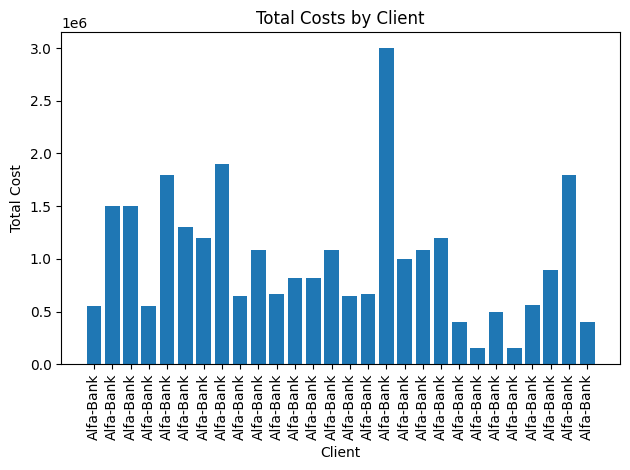

In [1]:
import json
import matplotlib.pyplot as plt

# Load JSON data
data = json.loads('''
[{"Client": "Alfa-Bank","Date":"__ .__.2019", "Total Cost" : 550000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1500000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1500000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 550000},{"Client": "Alfa-Bank","Date":"__ ___________ 2019", "Total Cost" : 1800000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1300000},{"Client": "Alfa-Bank","Date":"___ _____________ 2019", "Total Cost" : 1200000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1900000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 650000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1080000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 670000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 820000},{"Client": "Alfa-Bank","Date":"14.03.2019", "Total Cost" : 820000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1080000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 650000},{"Client": "Alfa-Bank","Date":"2019", "Total Cost" : 670000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 3000000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1000000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1080000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1200000},{"Client": "Alfa-Bank","Date":"___.___2019", "Total Cost" : 400000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 150000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 500000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 150000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 560000},{"Client": "Alfa-Bank","Date":"2019", "Total Cost" : 890000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1800000},{"Client": "Alfa-Bank","Date":"2019", "Total Cost" : 400000}]
''')

# Extract Client and Total Cost values
clients = [item['Client'] for item in data]
total_costs = [item['Total Cost'] for item in data]

# Create a figure and axis object
fig, ax = plt.subplots()

# Set the xticks to be the client names
ax.set_xticks(range(len(clients)))
ax.set_xticklabels(clients, rotation=90)

# Plot the total costs as bars
ax.bar(range(len(total_costs)), total_costs)

# Set the title and labels
ax.set_title('Total Costs by Client')
ax.set_xlabel('Client')
ax.set_ylabel('Total Cost')

# Show the plot
plt.tight_layout()
plt.show()

In [171]:
pref='make Client x-axis and Total Cost y-axis\n'
pref+=ans_text

In [172]:
async for text in chain1.astream({"user_input":pref}):
        print(text.content, end="", flush=True)

Here is the code in Python using Matplotlib to create a chart based on the given JSON data:

```python
import matplotlib.pyplot as plt
import json

# Load the JSON data
data = json.loads('[{"Client": "Alfa-Bank","Date":"__ .__.2019", "Total Cost" : 550000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1500000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1500000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 550000},{"Client": "Alfa-Bank","Date":"__ ___________ 2019", "Total Cost" : 1800000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1300000},{"Client": "Alfa-Bank","Date":"___ _____________ 2019", "Total Cost" : 1200000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1900000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 650000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1080000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 670000},{"Client": "Alfa-Bank","Date":"09.01.2018", "

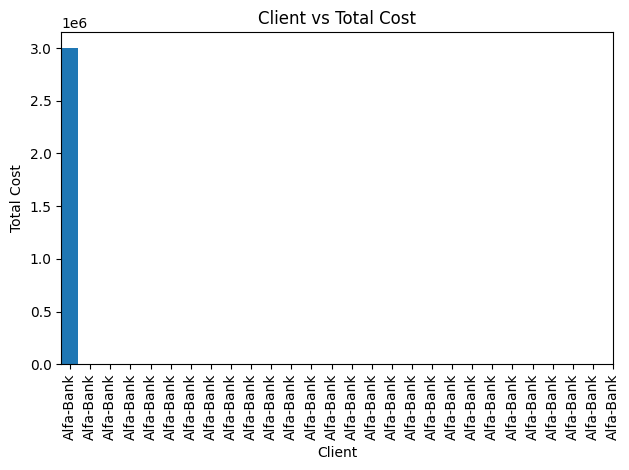

In [2]:
import matplotlib.pyplot as plt
import json

# Load the JSON data
data = json.loads('[{"Client": "Alfa-Bank","Date":"__ .__.2019", "Total Cost" : 550000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1500000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1500000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 550000},{"Client": "Alfa-Bank","Date":"__ ___________ 2019", "Total Cost" : 1800000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1300000},{"Client": "Alfa-Bank","Date":"___ _____________ 2019", "Total Cost" : 1200000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1900000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 650000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1080000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 670000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 820000},{"Client": "Alfa-Bank","Date":"14.03.2019", "Total Cost" : 820000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1080000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 650000},{"Client": "Alfa-Bank","Date":"2019", "Total Cost" : 670000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 3000000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1000000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1080000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1200000},{"Client": "Alfa-Bank","Date":"___.___2019", "Total Cost" : 400000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 150000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 500000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 150000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 560000},{"Client": "Alfa-Bank","Date":"2019", "Total Cost" : 890000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1800000},{"Client": "Alfa-Bank","Date":"2019", "Total Cost" : 400000}]')

# Extract the client and total cost data
clients = [item['Client'] for item in data]
total_costs = [item['Total Cost'] for item in data]

# Create a bar chart
plt.bar(clients, total_costs)

# Set the x-axis tick labels to the clients
plt.xticks(range(len(clients)), clients, rotation=90)

# Set the title and labels
plt.title('Client vs Total Cost')
plt.xlabel('Client')
plt.ylabel('Total Cost')

# Show the plot
plt.tight_layout()
plt.show()

In [173]:
pref='make each Client value a position on x-axis and each Date value a position on y-axis\n\n'
pref+=ans_text

In [174]:
async for text in chain1.astream({"user_input":pref}):
        print(text.content, end="", flush=True)

Here is the Python code using Matplotlib to create a chart for the given info:
```python
import matplotlib.pyplot as plt

# Load JSON data
data = [{'Client': 'Alfa-Bank', 'Date':'__ .__.2019', "Total Cost" : 550000},
        {'Client': 'Alfa-Bank','Date':'09.01.2018', "Total Cost" : 1500000},
        # ... rest of the data
       ]

# Extract Client and Date values
clients = [item['Client'] for item in data]
dates = [item['Date'] for item in data]

# Create a figure with two subplots (not needed here)
plt.figure()

# Set x-axis ticks to display unique client names
unique_clients = sorted(set(clients))
xticks = [i + 1 for i in range(len(unique_clients))]
xtick_labels = unique_clients

# Plot bars for each Client value
for i, client in enumerate(unique_clients):
    costs = [item['Total Cost'] for item in data if item['Client'] == client]
    plt.bar(xticks[i], sum(costs), label=client)

# Add labels and legend
plt.xlabel('Client')
plt.ylabel('Total Cost')
plt.xticks(xtick_labels)
plt.le

ConversionError: Failed to convert value(s) to axis units: ['Alfa-Bank']

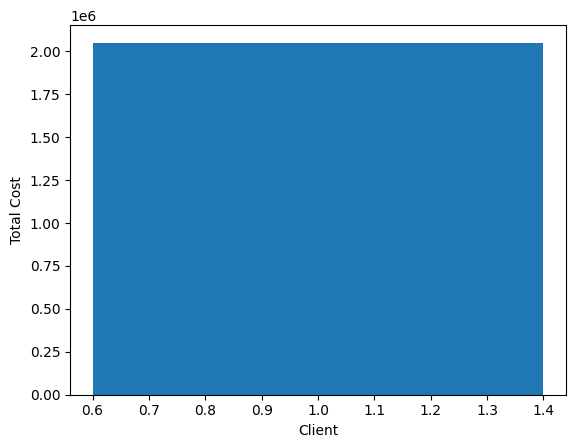

In [3]:
import matplotlib.pyplot as plt

# Load JSON data
data = [{'Client': 'Alfa-Bank', 'Date':'__ .__.2019', "Total Cost" : 550000},
        {'Client': 'Alfa-Bank','Date':'09.01.2018', "Total Cost" : 1500000},
        # ... rest of the data
       ]

# Extract Client and Date values
clients = [item['Client'] for item in data]
dates = [item['Date'] for item in data]

# Create a figure with two subplots (not needed here)
plt.figure()

# Set x-axis ticks to display unique client names
unique_clients = sorted(set(clients))
xticks = [i + 1 for i in range(len(unique_clients))]
xtick_labels = unique_clients

# Plot bars for each Client value
for i, client in enumerate(unique_clients):
    costs = [item['Total Cost'] for item in data if item['Client'] == client]
    plt.bar(xticks[i], sum(costs), label=client)

# Add labels and legend
plt.xlabel('Client')
plt.ylabel('Total Cost')
plt.xticks(xtick_labels)
plt.legend()

# Show plot
plt.show()

In [175]:
pref='make Client x-axis and Date y-axis\n'
pref+=ans_text

In [176]:
async for text in chain1.astream({"user_input":pref}):
        print(text.content, end="", flush=True)

Here is the Python code to generate a bar chart using Matplotlib with Client as x-axis and Date as y-axis:

```python
import matplotlib.pyplot as plt
import json

# Load data from JSON
data = '''
[{"Client": "Alfa-Bank","Date":"__ .__.2019", "Total Cost" : 550000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1500000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1500000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 550000},{"Client": "Alfa-Bank","Date":"__ ___________ 2019", "Total Cost" : 1800000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1300000},{"Client": "Alfa-Bank","Date":"___ _____________ 2019", "Total Cost" : 1200000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1900000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 650000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1080000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 670000},{"Client": "Alfa-Bank","Date":"09.01.

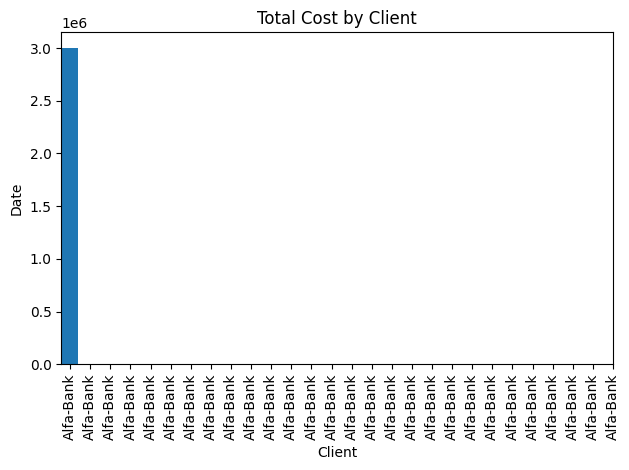

In [4]:
import matplotlib.pyplot as plt
import json

# Load data from JSON
data = '''
[{"Client": "Alfa-Bank","Date":"__ .__.2019", "Total Cost" : 550000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1500000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1500000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 550000},{"Client": "Alfa-Bank","Date":"__ ___________ 2019", "Total Cost" : 1800000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1300000},{"Client": "Alfa-Bank","Date":"___ _____________ 2019", "Total Cost" : 1200000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1900000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 650000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1080000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 670000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 820000},{"Client": "Alfa-Bank","Date":"14.03.2019", "Total Cost" : 820000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1080000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 650000},{"Client": "Alfa-Bank","Date":"2019", "Total Cost" : 670000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 3000000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1000000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1080000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1200000},{"Client": "Alfa-Bank","Date":"___.___2019", "Total Cost" : 400000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 150000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 500000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 150000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 560000},{"Client": "Alfa-Bank","Date":"2019", "Total Cost" : 890000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1800000},{"Client": "Alfa-Bank","Date":"2019", "Total Cost" : 400000}]
'''

# Parse JSON data
data = json.loads(data)

# Extract Client and Date information
clients = [item['Client'] for item in data]
dates = [item['Date'] for item in data]

# Extract Total Cost information
costs = [item['Total Cost'] for item in data]

# Create a figure and axis
fig, ax = plt.subplots()

# Plot bars
ax.bar(clients, costs)

# Set x-axis tick labels to display full date values
xticks = []
for i, client in enumerate(clients):
    if ' ' in client:
        year = client.split(' ')[-1]
        monthDay = client.replace(year, '')
        xticks.append(f'{monthDay} {year}')
    else:
        xticks.append(client)

# Set x-axis tick labels
ax.set_xticks(range(len(clients)))
ax.set_xticklabels(xticks, rotation=90)

# Set title and labels
ax.set_title('Total Cost by Client')
ax.set_xlabel('Client')
ax.set_ylabel('Date')

# Show the plot
plt.tight_layout()
plt.show()

In [177]:
pref='make each Date value a position on x-axis and each Total Cost value a position on y-axis\n\n'
pref+=ans_text

In [179]:
async for text in chain1.astream({"user_input":pref}):
        print(text.content, end="", flush=True)

Here is the Python code using Matplotlib to create a bar chart with Date on x-axis and Total Cost on y-axis:

```python
import matplotlib.pyplot as plt
import pandas as pd
import json

# Load JSON data
data = '''
[{"Client": "Alfa-Bank","Date":"__ .__.2019", "Total Cost" : 550000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1500000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1500000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 550000},{"Client": "Alfa-Bank","Date":"__ ___________ 2019", "Total Cost" : 1800000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1300000},{"Client": "Alfa-Bank","Date":"___ _____________ 2019", "Total Cost" : 1200000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1900000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 650000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1080000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 670000},{"Client": "Alfa-Ban

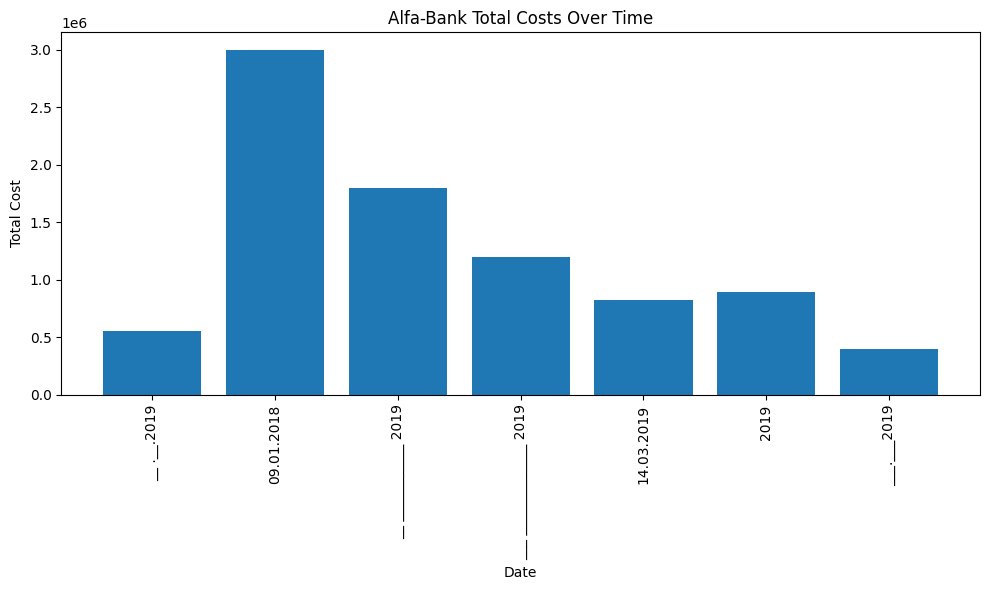

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import json

# Load JSON data
data = '''
[{"Client": "Alfa-Bank","Date":"__ .__.2019", "Total Cost" : 550000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1500000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1500000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 550000},{"Client": "Alfa-Bank","Date":"__ ___________ 2019", "Total Cost" : 1800000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1300000},{"Client": "Alfa-Bank","Date":"___ _____________ 2019", "Total Cost" : 1200000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1900000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 650000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1080000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 670000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 820000},{"Client": "Alfa-Bank","Date":"14.03.2019", "Total Cost" : 820000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1080000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 650000},{"Client": "Alfa-Bank","Date":"2019", "Total Cost" : 670000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 3000000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1000000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1080000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1200000},{"Client": "Alfa-Bank","Date":"___.___2019", "Total Cost" : 400000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 150000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 500000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 150000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 560000},{"Client": "Alfa-Bank","Date":"2019", "Total Cost" : 890000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1800000},{"Client": "Alfa-Bank","Date":"2019", "Total Cost" : 400000}]
'''

# Parse JSON data
data = json.loads(data)
df = pd.DataFrame(data)

# Create a bar chart with Date on x-axis and Total Cost on y-axis
plt.figure(figsize=(10,6))
plt.bar(df['Date'], df['Total Cost'])
plt.xlabel('Date')
plt.ylabel('Total Cost')
plt.title('Alfa-Bank Total Costs Over Time')
plt.xticks(rotation=90)
plt.tight_layout()

# Set labels for x-axis
plt.xticks(df['Date'].unique(), rotation=90)

# Show the plot
plt.show()

In [180]:
pref='make Date x-axis and Total Cost y-axis\n'
pref+=ans_text

In [181]:
async for text in chain1.astream({"user_input":pref}):
        print(text.content, end="", flush=True)

Here is the code in Python using Matplotlib to get a chart for the given information:

```python
import matplotlib.pyplot as plt
import pandas as pd
import json

# Load JSON data
data = '''
[{"Client": "Alfa-Bank","Date":"__ .__.2019", "Total Cost" : 550000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1500000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1500000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 550000},{"Client": "Alfa-Bank","Date":"__ ___________ 2019", "Total Cost" : 1800000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1300000},{"Client": "Alfa-Bank","Date":"___ _____________ 2019", "Total Cost" : 1200000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1900000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 650000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1080000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 670000},{"Client": "Alfa-Bank","Date":"09.01.2018",

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import json

# Load JSON data
data = '''
[{"Client": "Alfa-Bank","Date":"__ .__.2019", "Total Cost" : 550000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1500000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1500000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 550000},{"Client": "Alfa-Bank","Date":"__ ___________ 2019", "Total Cost" : 1800000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1300000},{"Client": "Alfa-Bank","Date":"___ _____________ 2019", "Total Cost" : 1200000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1900000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 650000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1080000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 670000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 820000},{"Client": "Alfa-Bank","Date":"14.03.2019", "Total Cost" : 820000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1080000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 650000},{"Client": "Alfa-Bank","Date":"2019", "Total Cost" : 670000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 3000000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1000000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1080000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1200000},{"Client": "Alfa-Bank","Date":"___.___2019", "Total Cost" : 400000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 150000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 500000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 150000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 560000},{"Client": "Alfa-Bank","Date":"2019", "Total Cost" : 890000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1800000},{"Client": "Alfa-Bank","Date":"2019", "Total Cost" : 400000}]
'''

data = json.loads(data)
df = pd.DataFrame([item for item in data])

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Plot the chart
plt.figure(figsize=(10,6))
for client in df['Client'].unique():
    client_df = df[df['Client'] == client]
    plt.bar(client_df['Date'], client_df['Total Cost'], label=client)

# Set x-axis and y-axis labels
plt.xlabel('Date')
plt.ylabel('Total Cost')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\MIKARKON\AppData\Local\Temp\ipykernel_9064\2088595400.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


DateParseError: Unknown datetime string format, unable to parse: __ .__.2019, at position 0

In [184]:
pref='make Date x-axis and amount of contracts y-axis\n'
pref+=ans_text

In [185]:
async for text in chain1.astream({"user_input":pref}):
        print(text.content, end="", flush=True)

Here is a Python code using matplotlib to create the chart you requested:

```python
import matplotlib.pyplot as plt
import json

# Load the JSON data
data = '''
[{"Client": "Alfa-Bank","Date":"__ .__.2019", "Total Cost" : 550000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1500000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1500000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 550000},{"Client": "Alfa-Bank","Date":"__ ___________ 2019", "Total Cost" : 1800000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1300000},{"Client": "Alfa-Bank","Date":"___ _____________ 2019", "Total Cost" : 1200000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1900000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 650000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1080000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 670000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 820000},{"Cl

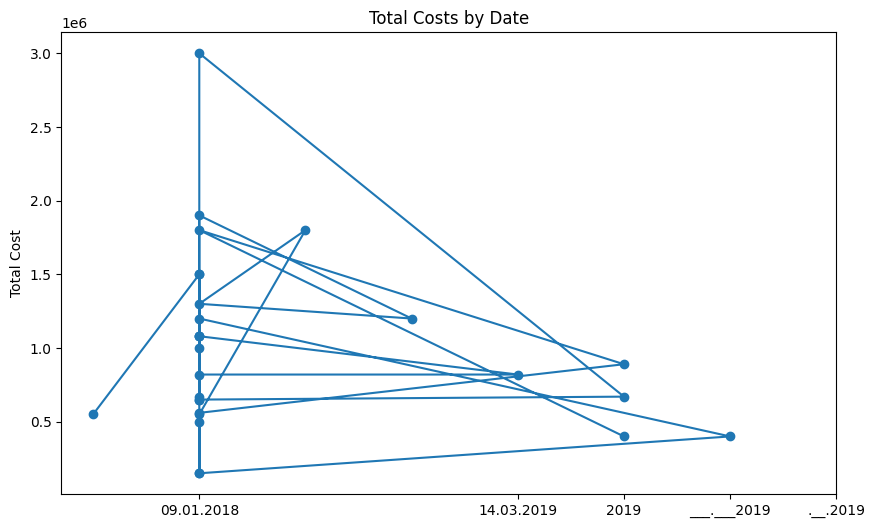

In [7]:
import matplotlib.pyplot as plt
import json

# Load the JSON data
data = '''
[{"Client": "Alfa-Bank","Date":"__ .__.2019", "Total Cost" : 550000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1500000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1500000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 550000},{"Client": "Alfa-Bank","Date":"__ ___________ 2019", "Total Cost" : 1800000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1300000},{"Client": "Alfa-Bank","Date":"___ _____________ 2019", "Total Cost" : 1200000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1900000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 650000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1080000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 670000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 820000},{"Client": "Alfa-Bank","Date":"14.03.2019", "Total Cost" : 820000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1080000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 650000},{"Client": "Alfa-Bank","Date":"2019", "Total Cost" : 670000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 3000000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1000000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1080000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1200000},{"Client": "Alfa-Bank","Date":"___.___2019", "Total Cost" : 400000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 150000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 500000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 150000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 560000},{"Client": "Alfa-Bank","Date":"2019", "Total Cost" : 890000},{"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1800000},{"Client": "Alfa-Bank","Date":"2019", "Total Cost" : 400000}]
'''

# Parse the JSON data
data = json.loads(data)

# Extract dates and total costs into separate lists
dates = [item['Date'] for item in data]
total_costs = [item['Total Cost'] for item in data]

# Create a line plot of total costs vs dates
plt.figure(figsize=(10, 6))
plt.plot(dates, total_costs, marker='o')

# Set x-axis labels to dates
xticks = list(set([date.split(' ')[-1] for date in dates]))
labels = [date for date in xticks]
plt.xticks(xticks, labels)

# Set y-axis label
plt.ylabel('Total Cost')

# Set title
plt.title('Total Costs by Date')

# Show the plot
plt.show()

In [186]:
pref='make each Date value a position on x-axis and sum of Total Cost values for each date provided a position on y-axis\n\n'
pref+=ans_text

In [187]:
async for text in chain1.astream({"user_input":pref}):
        print(text.content, end="", flush=True)

Here's a Python script using Matplotlib that creates the desired chart:

```python
import matplotlib.pyplot as plt
import json

# Load JSON data
data = json.loads('''
[
    {"Client": "Alfa-Bank","Date":"__ .__.2019", "Total Cost" : 550000},
    {"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1500000},
    {"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1500000},
    {"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 550000},
    {"Client": "Alfa-Bank","Date":"__ ___________ 2019", "Total Cost" : 1800000},
    {"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1300000},
    {"Client": "Alfa-Bank","Date":"___ _____________ 2019", "Total Cost" : 1200000},
    {"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1900000},
    {"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 650000},
    {"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1080000},
    {"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 670000},
    {"Clie

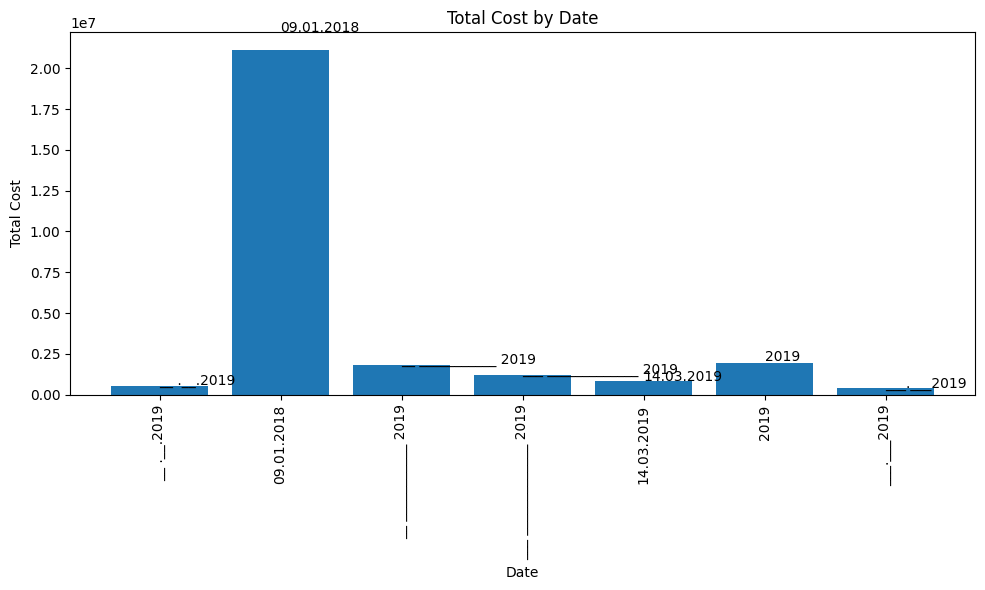

In [8]:
import matplotlib.pyplot as plt
import json

# Load JSON data
data = json.loads('''
[
    {"Client": "Alfa-Bank","Date":"__ .__.2019", "Total Cost" : 550000},
    {"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1500000},
    {"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1500000},
    {"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 550000},
    {"Client": "Alfa-Bank","Date":"__ ___________ 2019", "Total Cost" : 1800000},
    {"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1300000},
    {"Client": "Alfa-Bank","Date":"___ _____________ 2019", "Total Cost" : 1200000},
    {"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1900000},
    {"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 650000},
    {"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1080000},
    {"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 670000},
    {"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 820000},
    {"Client": "Alfa-Bank","Date":"14.03.2019", "Total Cost" : 820000},
    {"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1080000},
    {"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 650000},
    {"Client": "Alfa-Bank","Date":"2019", "Total Cost" : 670000},
    {"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 3000000},
    {"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1000000},
    {"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1080000},
    {"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1200000},
    {"Client": "Alfa-Bank","Date":"___.___2019", "Total Cost" : 400000},
    {"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 150000},
    {"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 500000},
    {"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 150000},
    {"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 560000},
    {"Client": "Alfa-Bank","Date":"2019", "Total Cost" : 890000},
    {"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1800000},
    {"Client": "Alfa-Bank","Date":"2019", "Total Cost" : 400000}
]
''')

# Extract dates and total costs
dates = []
total_costs = {}
for item in data:
    date = item['Date']
    if date not in dates:
        dates.append(date)
    total_cost = item['Total Cost']
    if date in total_costs:
        total_costs[date] += total_cost
    else:
        total_costs[date] = total_cost

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(total_costs.keys(), [v for v in total_costs.values()])
plt.xlabel('Date')
plt.ylabel('Total Cost')
plt.title('Total Cost by Date')
plt.xticks(rotation=90)
for i, v in enumerate(total_costs.keys()):
    plt.text(i, total_costs[v] + (total_costs[v]*0.05), str(v))
plt.tight_layout()
plt.show()

In [196]:
pref='make a plot that will show Client and Date'
pref+=ans_text

In [197]:
async for text in chain1.astream({"user_input":pref}):
        print(text.content, end="", flush=True)

Here's a Python code that uses Matplotlib to create the desired chart:

```python
import matplotlib.pyplot as plt
import json

# Given JSON data
data = [
    {"Client": "Alfa-Bank","Date":"2019", "Total Cost" : 550000},
    {"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1500000},
    {"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1500000},
    {"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 550000},
    {"Client": "Alfa-Bank","Date":"2019", "Total Cost" : 1800000},
    {"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1300000},
    {"Client": "Alfa-Bank","Date":"2019", "Total Cost" : 1200000},
    {"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1900000},
    {"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 650000},
    {"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1080000},
    {"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 670000},
    {"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 82

AttributeError: 'XAxis' object has no attribute 'get_majorticks'

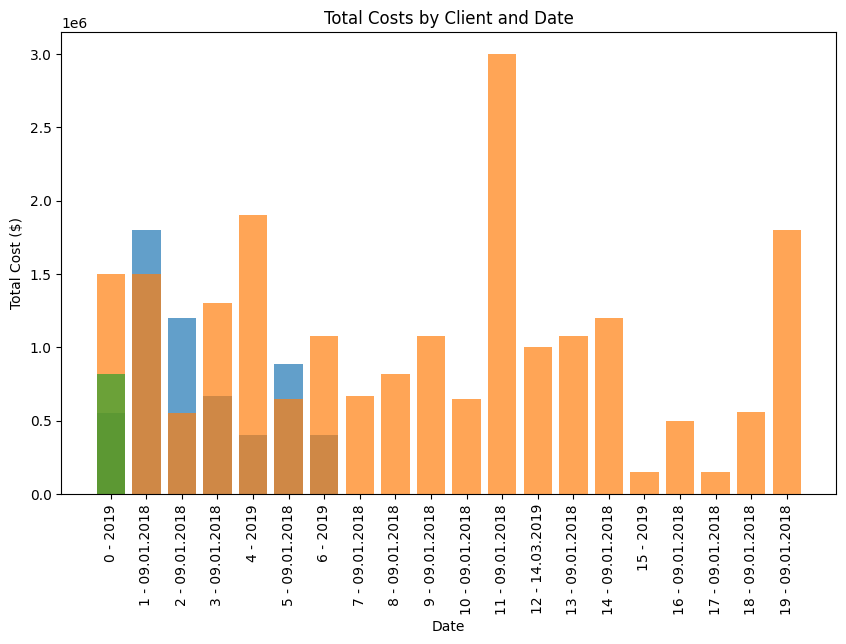

In [9]:
import matplotlib.pyplot as plt
import json

# Given JSON data
data = [
    {"Client": "Alfa-Bank","Date":"2019", "Total Cost" : 550000},
    {"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1500000},
    {"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1500000},
    {"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 550000},
    {"Client": "Alfa-Bank","Date":"2019", "Total Cost" : 1800000},
    {"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1300000},
    {"Client": "Alfa-Bank","Date":"2019", "Total Cost" : 1200000},
    {"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1900000},
    {"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 650000},
    {"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1080000},
    {"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 670000},
    {"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 820000},
    {"Client": "Alfa-Bank","Date":"14.03.2019", "Total Cost" : 820000},
    {"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1080000},
    {"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 650000},
    {"Client": "Alfa-Bank","Date":"2019", "Total Cost" : 670000},
    {"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 3000000},
    {"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1000000},
    {"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1080000},
    {"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1200000},
    {"Client": "Alfa-Bank","Date":"2019", "Total Cost" : 400000},
    {"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 150000},
    {"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 500000},
    {"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 150000},
    {"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 560000},
    {"Client": "Alfa-Bank","Date":"2019", "Total Cost" : 890000},
    {"Client": "Alfa-Bank","Date":"09.01.2018", "Total Cost" : 1800000},
    {"Client": "Alfa-Bank","Date":"2019", "Total Cost" : 400000}
]

# Extract client and date from JSON data
clients = [item['Client'] for item in data]
dates = [item['Date'] for item in data]

# Create a list of total costs grouped by client and date
total_costs = {}
for i, item in enumerate(data):
    key = f"{item['Client']} - {item['Date']}"
    if key not in total_costs:
        total_costs[key] = []
    total_costs[key].append(item['Total Cost'])

# Create a bar chart with dates on the x-axis and client labels
plt.figure(figsize=(10, 6))
for i, (client_date, costs) in enumerate(total_costs.items()):
    plt.bar([f"{j} - {dates[j] if j < len(dates) else '2019'}" for j, _ in enumerate(costs)], costs, label=clients[i], alpha=0.7)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Total Cost ($)')
plt.title('Total Costs by Client and Date')
plt.xticks(rotation=90)
for tick in plt.gca().xaxis.get_majorticks():
    if isinstance(tick, str):
        tick = tick.split('-')[0]
    if '09.01.2018' not in tick:
        plt.gcf().text(0.05, 1 - (tick/plt.xlim()[1]), tick, ha="right")

# Show the plot
plt.tight_layout()
plt.legend(title='Client', bbox_to_anchor=(1.1, 1))
plt.show()